## Home Assignment 4

Submit your solution via Moodle until 23.59pm on Wednesday, January 22nd. Late submissions are accepted for 12 hours following the deadline, with 1/3 of the total possible points deducted from the score.

Submit your solutions in teams of up 2-3 members. **Single student submissions will not be graded anymore**.
Please denote all members of the team with their student ID and full name in the notebook. In this home assignment, you only have to submit a .ipynb notebook. Do not submit anything else than this file!

Cite ALL your sources for coding this home assignment. In case of plagiarism (copying solutions from other teams or from the internet) ALL team members will be expelled from the course without warning.

##### List team members, including all student IDs here:
1. Student 1 (123456)
2. Student 2 (123457)
3. (optional) Student 3 (123458)

In [1]:
import numpy as np
import networkx as nx

### Task 1: Robustness Attacks (2 pts)


#### a) Random Attacks (0.5 pts)

Implement a function that performs a random attack of deleting $n$ nodes on a given graph. Use the signature in the cell below.

In [56]:
# INPUT VALUES
# G: networkx Graph
# n: number of deleted nodes
# 
# return G without deleted nodes

def random_attack(G,n):
    #your code here

#### b) Targeted Attacks  (0.5 pts)

Implement a function that performs a targeted attack of deleting the $n$ highest-degree nodes on a given graph. Use the signature in the cell below.

In [20]:
# INPUT VALUES
# G: networkx Graph
# n: number of deleted nodes
#
# return G without deleted nodes

def target_attack(G,n):
    # your code here

#### c) Attacking Empirical and Random Graphs (1 pt)

Create an Erdos-Renyi and a Barabasi-Albert graph with 1000 nodes and average degree 2.

For both graphs and attack types, conduct 50 consecutive attacks of removing 10 nodes, and plot the number of removed nodes against the share of the biggest connected component in the graph. For each graph, include the curves of both attacks in the same plot. What do you observe?

###  Task 2: Schelling's Model of Segregation            (3 pts)

In this task we implement a simulation of Schelling's model of segregation.  
A concise explanation on how the model is specified as well as another simulation can, for instance, be found here:

http://nifty.stanford.edu/2014/mccown-schelling-model-segregation/

#### a) Grid creation (0.25 pts)
Using the signature in the cell below, write a function that returns a numpy array of the given shape (rows, columns). Cells with a red agent should be marked with the value 1, cells with a blue agent with value 2, empty cells with a 0.

In [2]:
%matplotlib inline
import numpy as np
import random

# INPUT VALUES:
# shape: integer tuple, shape of grid
# share_red: percent share of red nodes in the data
# share_blue: percent share of blue nodes in the data 
# -> note that blue+red shares should be <1 aas empty cell are needed
def create_grid (shape, share_red, share_blue):
    # your code here
    shape_x = shape[0]
    shape_y = shape[1]
    tmap = np.zeros((shape_x,shape_y))
    num_red = int(shape_x*shape_y*share_red)
    num_blue = int(shape_x*shape_y*share_blue)
    
    while(num_red != 0):
        p_x = random.randint(0, shape_x-1)
        p_y = random.randint(0, shape_y-1)
        if tmap[p_x,p_y] == 0:
            tmap[p_x,p_y] = 1
            num_red = num_red-1
            
    while(num_blue != 0):
        p_x = random.randint(0, shape_x-1)
        p_y = random.randint(0, shape_y-1)
        if tmap[p_x,p_y] == 0:
            tmap[p_x,p_y] = 2
            num_blue = num_blue-1
            
    return tmap
    
# create_grid((60,70),0.5,0.3)

#### b) Visualization (0.25 pts)

Write a function that takes a numpy grid and plots it. We recommend to use matplotlib for this

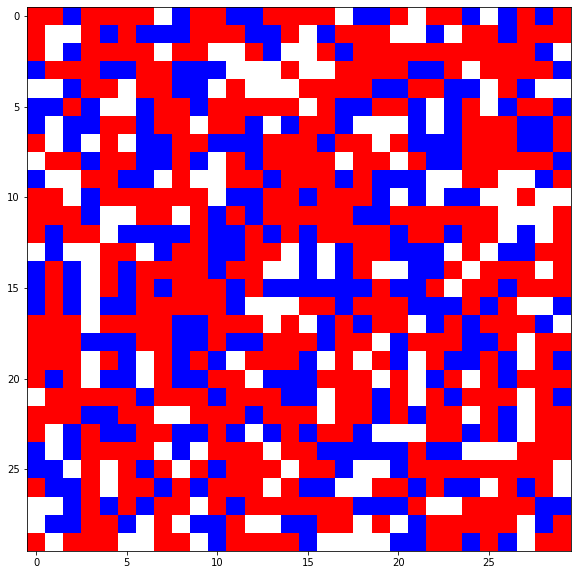

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# grid: 2D numpy array
def visualize(grid):
    # your code here
    colors = [(1, 0, 0), (0, 0, 1)]
    cm = LinearSegmentedColormap.from_list('RaB', colors)
    grid[grid==0] = None
    plt.figure(figsize=(20,10))
    plt.imshow(grid, cmap=cm, interpolation='nearest')
    plt.show()

visualize(create_grid((30,30),0.5,0.3))


#### c) Simulating the model (1.5 pts)

Write a function that performs a full simulation of Schelling's model given a specific initial state, by performing steps until the maximum number of steps is reached or there was no change for the given amount of steps. Every n_viz steps, as well as at the very end, a visualization of the model should be plotted.
Use a model where in case that a particular agent is unhappy, he moves a to a randomly chosen vacant place.

Using matplotlib backend: MacOSX
Iteration number is 86
END


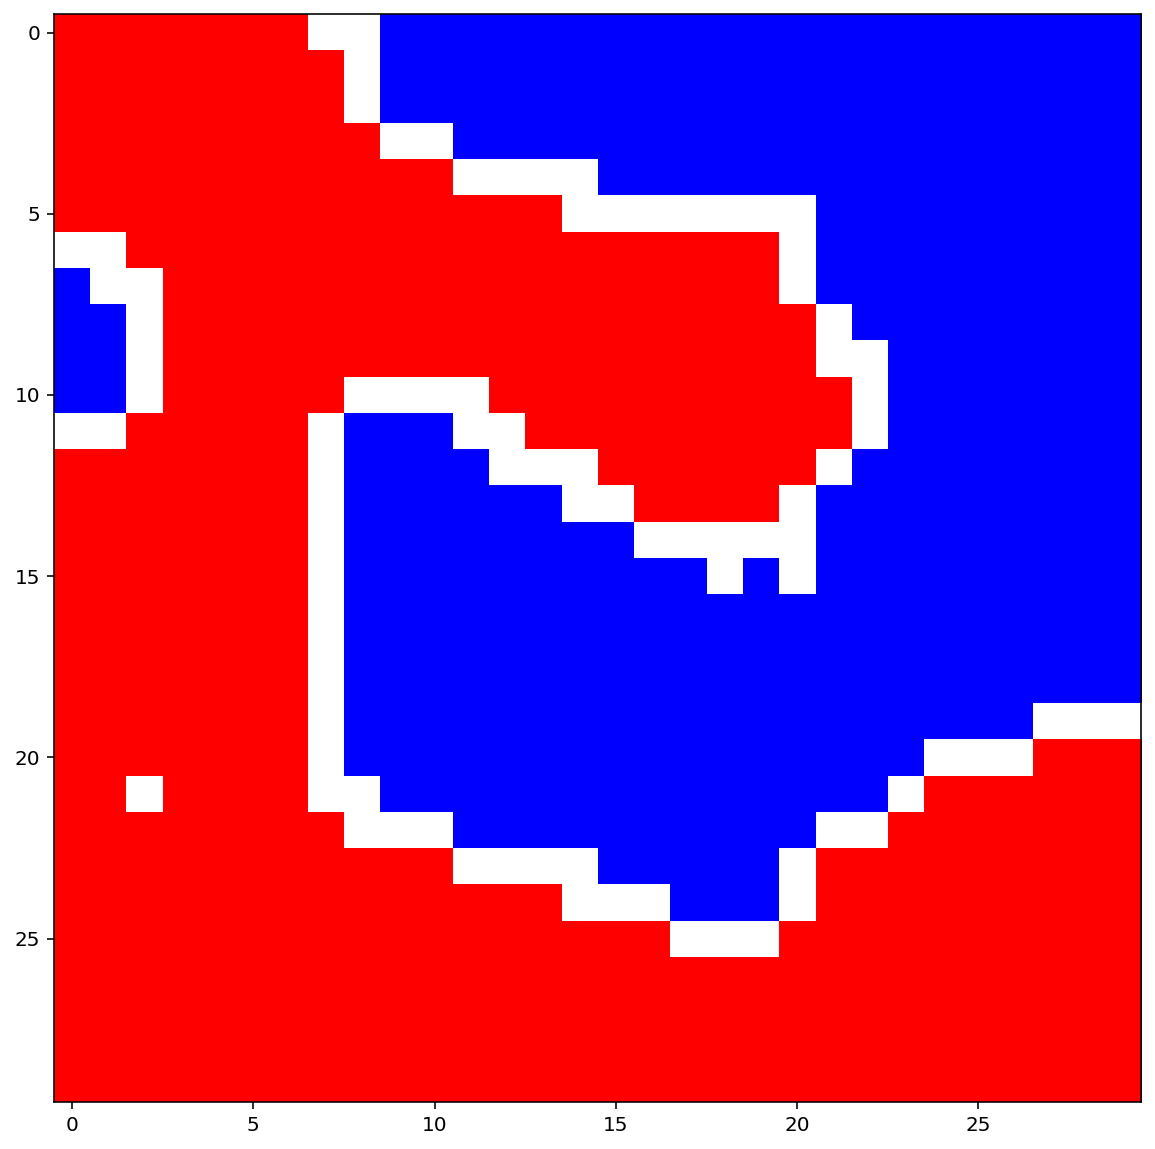

In [4]:
%matplotlib auto
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import copy

def is_move_neighbors(matrix, row, col, percent):
    val_point = matrix[row,col]
    
    list_neighbors = []
    for i in row-1, row, row+1:
        if i < 0 or i == len(matrix): continue
        for j in col-1, col, col+1:
            if j < 0 or j == len(matrix[i]): continue
            if i == row and j == col: continue
            if matrix[i,j] != 0:
                list_neighbors.append(matrix[i,j])

    count_point = list_neighbors.count(val_point)
    if len(list_neighbors) == 0:
        return True
    percent_point = count_point/len(list_neighbors)
    
    if percent_point < percent:
        return True
    else:
        return False
    
    
def show_grid(plt,grid,cm):
    plt.clf()
    show_grid = copy.deepcopy(grid)
    show_grid[show_grid==0] = None
    plt.imshow(show_grid, cmap=cm, interpolation='nearest')
    plt.draw()
    plt.pause(0.001)

# INPUT VALUES: 
# grid: initial grid to start simulation with (2D numpy array)
# pp: preferred poportion of neighbors of own class
# n_max: maximum number of iteration steps
# no_changes_steps: number of simulation steps after which one has to stop if no change in the grid occurs
# n_viz: number of iteration steps after which current state is plotted

# RETURN:
# final_grid: 2D numpy array representing the grid at the end of your simulation

def simulate(grid, preferred_proportion, n_max, no_changes_steps, n_viz):
    # your code here
    
    plt.ion()
    plt.figure(figsize=(20,10))
    colors = [(1, 0, 0), (0, 0, 1)]
    cm = LinearSegmentedColormap.from_list('RaB', colors)
        
    show_grid(plt,grid,cm)

    num_no_changes_steps = 0
    flag_changes_steps = False
    num_viz = 0
    [rows, cols] = grid.shape
    
    for it in range(n_max):
        if num_no_changes_steps != no_changes_steps:   
            for i in range(rows):
                for j in range(cols):
                    val_point = grid[i,j]
                    if val_point != 0 :
                        if is_move_neighbors(grid,i,j,preferred_proportion) == True:
                            list_grid_zero = np.where(grid == 0)  
                            rand = random.randint(0, len(list_grid_zero[0])-1)
                            rand_row = list_grid_zero[0][rand]
                            rand_col = list_grid_zero[1][rand]
                            grid[rand_row,rand_col] = val_point
                            grid[i,j] = 0
                            flag_changes_steps = True
            
            if flag_changes_steps == False:
                num_no_changes_steps = num_no_changes_steps + 1
#                 print(it, num_no_changes_steps)
            else:
                flag_changes_steps = False
            
            num_viz = num_viz + 1 
            if num_viz == n_viz:

                show_grid(plt,grid,cm)
                
                num_viz = 0
        else:
            break
            
    final_grid = grid
    
    show_grid(plt,grid,cm)
    
    plt.ioff()
    print("Iteration number is", it+1-num_no_changes_steps)
    print("END")
    return final_grid

init_grid = create_grid((30,30),0.5,0.4)
final_grid = simulate(grid=init_grid, preferred_proportion=0.69, n_max=200, no_changes_steps=10, n_viz=1)

#### d) Model Extension (1 pt)

Adaptt your functions such that they support multiple groups (instead of just red and blue), and each group can have a separate preferred proportion. Use the signatures from the cells below, where changes from the signatures in 2c) are explained.

In [5]:
# shares: list of shares for each color, entries in return matrix from 0 (empty cell) to number of colors.
def create_grid_ext(shape, shares):
    # your code here
    shape_x = shape[0]
    shape_y = shape[1]
    tmap = np.zeros((shape_x,shape_y))
    
    list_number = []
    for percent in shares:
        list_number.append(int(shape_x*shape_y*percent))

    num_item = 1
    for t in list_number:
        count = t
        while(count != 0):
            p_x = random.randint(0, shape_x-1)
            p_y = random.randint(0, shape_y-1)
            if tmap[p_x,p_y] == 0:
                tmap[p_x,p_y] = num_item
                count = count - 1
        num_item = num_item + 1
        
    return tmap


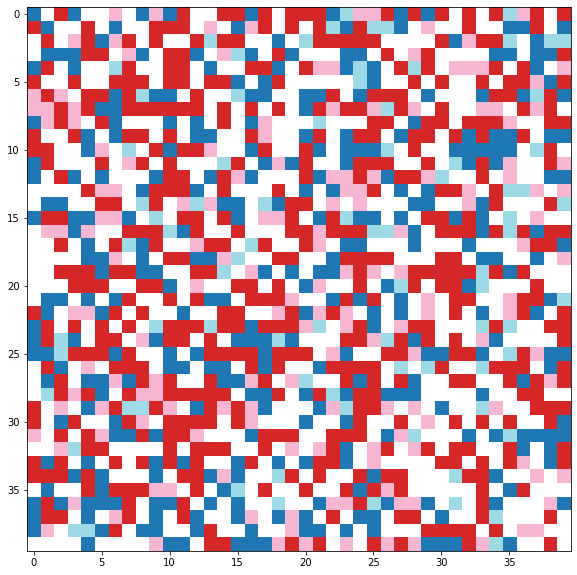

In [6]:
%matplotlib inline

# adapt color selection
def visualize_ext(grid):
    # your code here
    grid[grid==0] = None
    plt.figure(figsize=(20,10))
    plt.imshow(grid, cmap='tab20', interpolation='nearest')
    plt.show()
    
color_shares = [0.2, 0.3, 0.1, 0.05]
init_grid = create_grid_ext((40,40), color_shares)
visualize_ext(init_grid)

Using matplotlib backend: MacOSX
Iteration number is 37
END


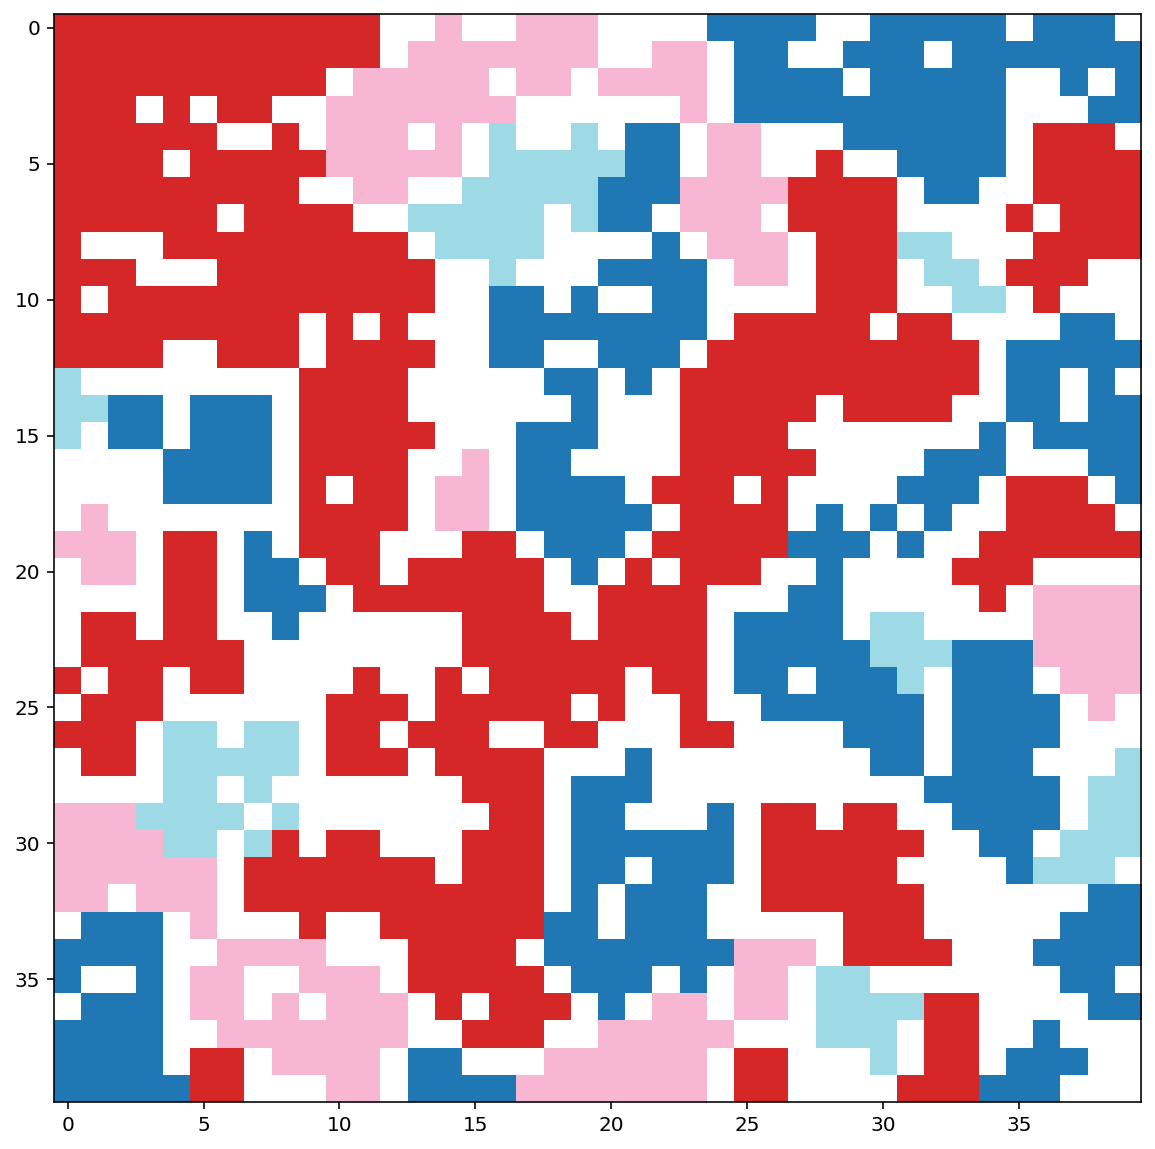

In [7]:
%matplotlib auto
# preferred_proportions: give a list of preferred proportions for each color

def is_move_neighbors_ext(matrix, row, col, percent):
    val_point = matrix[row,col]
#     print(val_point)
    list_neighbors = []
    for i in row-1, row, row+1:
        if i < 0 or i == len(matrix): continue
        for j in col-1, col, col+1:
            if j < 0 or j == len(matrix[i]): continue
            if i == row and j == col: continue
            if matrix[i,j] != 0:
                list_neighbors.append(matrix[i,j])

    count_point = list_neighbors.count(val_point)
    if len(list_neighbors) == 0:
        return True
    percent_point = count_point/len(list_neighbors)
    
#     print()
    
    if percent_point < percent[int(val_point-1)]:
        return True
    else:
        return False


def show_grid_ext(plt,grid):
    plt.clf()
    show_grid = copy.deepcopy(grid)
    show_grid[show_grid==0] = None
    plt.imshow(show_grid, cmap='tab20', interpolation='nearest')
    plt.draw()
    plt.pause(0.001)


def simulate_ext(grid, preferred_proportion, max_steps, no_changes_steps, iterations_to_next_vizualization):
    n_max = max_steps
    n_viz = iterations_to_next_vizualization
    
    plt.ion()
    plt.figure(figsize=(20,10))
        
    show_grid_ext(plt,grid)

    num_no_changes_steps = 0
    flag_changes_steps = False
    num_viz = 0
    [rows, cols] = grid.shape
    
    for it in range(n_max):
        if num_no_changes_steps != no_changes_steps:   
            for i in range(rows):
                for j in range(cols):
                    val_point = grid[i,j]
                    if val_point != 0 :
                        if is_move_neighbors_ext(grid,i,j,preferred_proportion) == True:
                            list_grid_zero = np.where(grid == 0)
                            rand = random.randint(0, len(list_grid_zero[0])-1)
                            rand_row = list_grid_zero[0][rand]
                            rand_col = list_grid_zero[1][rand]
                            grid[rand_row,rand_col] = val_point
                            grid[i,j] = 0
                            flag_changes_steps = True
            
            if flag_changes_steps == False:
                num_no_changes_steps = num_no_changes_steps + 1
#                 print(it, num_no_changes_steps)
            else:
                flag_changes_steps = False
            
            num_viz = num_viz + 1 
            if num_viz == n_viz:

                show_grid_ext(plt,grid)
                
                num_viz = 0
        else:
            break
            
    final_grid = grid
    
    show_grid_ext(plt,grid)
    
    plt.ioff()
    print("Iteration number is", it+1-num_no_changes_steps)
    print("END")
    return final_grid

color_shares = [0.2, 0.3, 0.1, 0.05]
init_grid = create_grid_ext((40,40), color_shares)
pp = [0.5, 0.6, 0.6, 0.4]
final_grid = simulate_ext(grid=init_grid, preferred_proportion=pp, max_steps=500, no_changes_steps=10, iterations_to_next_vizualization=1)
    